<h2> Name: Christian Grier

In [90]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [91]:
DATA = Path("C:/Users/chris/Documents/DS 110-DM/data")

In [92]:
df = pd.read_csv('Tayko.csv')
print(df.dtypes)

sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object


<h3> Question 2.a

In [93]:
pd.pivot_table(df, index= 'Gender=male', values= "Spending", aggfunc= [np.mean, np.std])

,mean,std
,Spending,Spending
Gender=male,,
0,107.339642,190.83233
1,98.350810,183.02006


In [94]:
pd.pivot_table(df, index= 'Web order', values= "Spending", aggfunc= [np.mean, np.std])

,mean,std
,Spending,Spending
Web order,,
0,82.902439,173.417088
1,129.199531,200.463840


In [95]:
pd.pivot_table(df, index= 'Address_is_res', values= "Spending", aggfunc= [np.mean, np.std])

,mean,std
,Spending,Spending
Address_is_res,,
0,105.306162,199.521159
1,93.174208,132.204281


In [96]:
pd.pivot_table(df, index= 'US', values= "Spending", aggfunc= [np.mean, np.std])

,mean,std
,Spending,Spending
US,,
0,101.216524,174.844401
1,102.924803,189.275664


<h3> Question 2.b

[Text(0.5, 0, 'Spending'), Text(0, 0.5, 'Freq')]

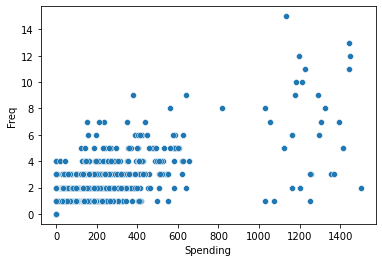

In [97]:
sns.scatterplot(x='Spending', y='Freq' , data=df).set( xlabel = 'Spending', ylabel = 'Freq')

[Text(0.5, 0, 'Spending'), Text(0, 0.5, 'last update days ago')]

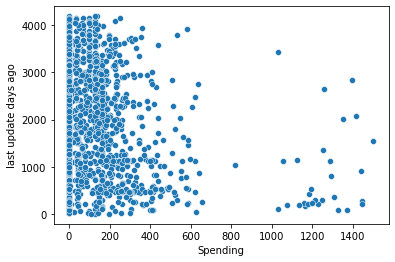

In [98]:
sns.scatterplot(x='Spending', y='last_update_days_ago' , data=df).set( xlabel = 'Spending', ylabel = 'last update days ago')

Based off of these two scatterplots we can see that there isnt a linear relationship between the two variables. Although they both reduce in occurance as spending increases, last_update_days_ago has more variance at its lower spending.

<h3> Question 2.c

In [99]:
df.columns = [c.replace(' ', '_').replace('=', '_') for c in df.columns]
#to view the statsmodel information 
predictors = ['Freq', 'last_update_days_ago', 'Web_order', 'Gender_male', 'Address_is_res', 'US']
outcome = 'Spending'

X = df[predictors]
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
train_df = train_X.join(train_y)

model=sm.ols(formula='Spending ~ US + Freq + last_update_days_ago + Web_order + Gender_male + Address_is_res', data=train_df).fit()
print(model.summary())

#so that I can view the regression summary of the validation set.
tayko_lm = LinearRegression()
tayko_lm.fit(train_X, train_y)
tayko_lm_pred = tayko_lm.predict(valid_X)
regressionSummary(valid_y, tayko_lm_pred)

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          1.26e-188
Time:                        18:56:22   Log-Likelihood:                -7506.3
No. Observations:                1200   AIC:                         1.503e+04
Df Residuals:                    1193   BIC:                         1.506e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.1763 

<h3> iii.

Based on this we can assume that freq pruchasers are most likely to spend a large amount of money.

<h3>iv.

Using backwards elimination we would remove the variable with the highest p-value. In our case that would be US.

<h3> vi.

In [100]:
# Use predict() to make predictions on a new set

result = pd.DataFrame({'Predicted': tayko_lm_pred, 'Actual': valid_y})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, tayko_lm_pred)

       Predicted  Actual
674    89.214915       0
1699  202.231362     184
1282   49.159303       0
1315  824.841659    1289
1210    0.121196       0
1636   86.766675       0
613    58.018614       0
447   247.428569    1255
1131   67.036615       0
808    67.825031       0
1496   -7.098168       0
1468  194.814024     411
1682  -13.480101       0
1149  -32.457046       0
442    61.247979       0
1813    4.497885     173
654   -46.046854       0
1264  -32.315195       0
858    80.219048       0
1482   51.783900       0

Regression statistics

               Mean Error (ME) : 7.1933
Root Mean Squared Error (RMSE) : 136.7397
     Mean Absolute Error (MAE) : 83.6010


The predictive accuracy of this model is not that good as there are many occurances of predictions on 0's. 

<h3> vii.

1.0


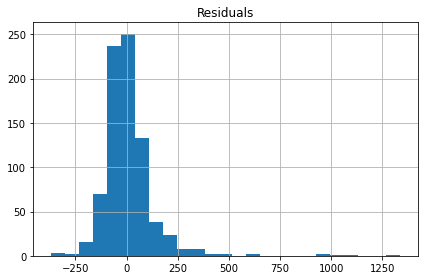

In [101]:
all_residuals = valid_y - tayko_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

The model does follow a normal distribution and this is good when it comes to predicting as a model that follows a normal distribution is best. 

<h3> Question 4.a

In [139]:
car_df = pd.read_csv(DATA / 'ToyotaCorolla.csv')
print(car_df.dtypes)

Id                   float64
Model                 object
Price                float64
Age_08_04            float64
Mfg_Month            float64
Mfg_Year             float64
KM                   float64
Fuel_Type             object
HP                   float64
Met_Color            float64
Color                 object
Automatic            float64
CC                   float64
Doors                float64
Cylinders            float64
Gears                float64
Quarterly_Tax        float64
Weight               float64
Mfr_Guarantee        float64
BOVAG_Guarantee      float64
Guarantee_Period     float64
ABS                  float64
Airbag_1             float64
Airbag_2             float64
Airco                float64
Automatic_airco      float64
Boardcomputer        float64
CD_Player            float64
Central_Lock         float64
Powered_Windows      float64
Power_Steering       float64
Radio                float64
Mistlamps            float64
Sport_Model          float64
Backseat_Divid

In [144]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']
outcome = 'Price'

# partition data
X = pd.get_dummies(car_df[predictors], prefix_sep='_', drop_first=True)
car_df.replace([np.inf, -np.inf], np.nan)
#car_df.dropna(inplace=True)
y = car_df[outcome]

#setting ratio size
train_ratio = 0.5
valid_ratio = 0.3
test_ratio = 0.2

# Produces test split.
X_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=test_ratio)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - test_ratio
ratio_val_adjusted = valid_ratio / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
    X_remaining, y_remaining, test_size=ratio_val_adjusted)

car_lm = LinearRegression()
car_lm.fit(X_train, y_train)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(y_train, car_lm.predict(X_train))

intercept  9888.1435160156
           Predictor  coefficient
0          Age_08_04  -112.760804
1                 KM    -0.017526
2                 HP    36.639214
3          Automatic   438.012053
4              Doors   135.842045
5      Quarterly_Tax    16.784320
6      Mfr_Guarantee   307.694564
7   Guarantee_Period    75.303894
8              Airco   143.060006
9    Automatic_airco  2691.521780
10         CD_Player   182.975163
11   Powered_Windows   544.575657
12       Sport_Model   378.368928
13           Tow_Bar  -297.080703
14  Fuel_Type_Diesel  1617.023785
15  Fuel_Type_Petrol  1597.687504

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1196.0699
            Mean Absolute Error (MAE) : 909.5433
          Mean Percentage Error (MPE) : -0.9825
Mean Absolute Percentage Error (MAPE) : 9.1209


In [145]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model_car(variables_car):
    if len(variables_car) == 0:
        return None
    model_car = LinearRegression()
    model_car.fit(X_train[variables_car], y_train)
    return model_car

def score_model_car(model_car, variables_car):
    if len(variables_car) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model_car, df=1)
    return AIC_score(y_train, model_car.predict(X_train[variables]), model_car)

best_model_car, best_variables_car = forward_selection(X_train.columns, train_model_car, score_model_car, verbose=True)

print(best_variables_car)

Variables: Age_08_04, KM, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=13794.24, constant


KeyError: "None of [Index(['Freq', 'last_update_days_ago', 'Web_order', 'Gender_male',\n       'Address_is_res', 'US'],\n      dtype='object')] are in the [columns]"

The four most important car specifications for predicting price are Age_08_04, Automatic_airco, KM, and Quarterly_Tax

<h3> Question 4.b

In [146]:
predictors = ['Age_08_04', 'KM', 'Automatic_airco', 'Quarterly_Tax']
outcome = 'Price'

# partition data
X = car_df[predictors]
y = car_df[outcome]

#setting ratio size
train_ratio = 0.5
valid_ratio = 0.3
test_ratio = 0.2

# Produces test split.
X_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=test_ratio)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - test_ratio
ratio_val_adjusted = valid_ratio / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
    X_remaining, y_remaining, test_size=ratio_val_adjusted)

car_lm = LinearRegression()
car_lm.fit(X_train, y_train)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(y_train, car_lm.predict(X_train))

intercept  17461.492822639004
         Predictor  coefficient
0        Age_08_04  -118.685535
1               KM    -0.024065
2  Automatic_airco  3938.833625
3    Quarterly_Tax    14.937444

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1288.4142
            Mean Absolute Error (MAE) : 982.9730
          Mean Percentage Error (MPE) : -1.1389
Mean Absolute Percentage Error (MAPE) : 9.6938


In [147]:
# Use predict() to make predictions on a new set
car_lm = LinearRegression()
car_lm.fit(X_train, y_train)
car_lm_pred = car_lm.predict(X_val)
result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': y_val, 
                       'Residual': y_val - car_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(y_val, car_lm_pred)

         Predicted   Actual     Residual
633   12609.259523  12950.0   340.740477
2799   8548.520922   8950.0   401.479078
15    15211.549213  18600.0  3388.450787
2273   6822.946146   6750.0   -72.946146
593   14183.347622  12950.0 -1233.347622
607   12912.310105  11500.0 -1412.310105
831    9863.570773   9950.0    86.429227
887   10511.750392  11950.0  1438.249608
521   12381.158015  11950.0  -431.158015
705   13589.139886  12450.0 -1139.139886
119   18172.125749  15999.0 -2173.125749
1525   8618.492282   9895.0  1276.507718
2255   7193.720718   8700.0  1506.279282
405   11527.527824  10500.0 -1027.527824
1219   8065.697428   5751.0 -2314.697428
2013  10588.934253  10950.0   361.065747
1849   9643.303766   9950.0   306.696234
2413   7725.894336   7500.0  -225.894336
1471   9338.031876  10450.0  1111.968124
2501   7465.880902   8950.0  1484.119098

Regression statistics

                      Mean Error (ME) : 112.7476
       Root Mean Squared Error (RMSE) : 1503.4077
            Mean

Looking at this we can see that the predictive model is still not completely all positive, but this model is better than using all variables. On average we are positive with more prices being predictided below the actual (which I would see as good).